In [2]:
import polars as pl

In [3]:
## Valid reads summary for all the tools

## tranquillyzer

tranquillyzer_HYB_valid_summary = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/tranquilizer/100_500bp_HYB_summary.tsv", separator="\t")
tranquillyzer_HYB_valid_summary = tranquillyzer_HYB_valid_summary.with_columns(pl.col("sample_size").str.replace("_mil", "",literal=True).cast(pl.Int64).alias("sample_size"))
tranquillyzer_HYB_valid_summary = tranquillyzer_HYB_valid_summary.rename({"num_valid_reads":"tranquillyzer_HYB_valid_reads", 
                                                                          "valid_reads_rate": "tranquillyzer_HYB_valid_reads_rate", 
                                                                          "num_reads_demuxed" : "tranquillyzer_HYB_demuxed_reads",
                                                                          "demuxing_rate": "tranquillyzer_HYB_demuxing_rate"})
print(tranquillyzer_HYB_valid_summary)

tranquillyzer_CRF_valid_summary = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/tranquilizer/100_500bp_CRF_summary.tsv", separator="\t")
tranquillyzer_CRF_valid_summary = tranquillyzer_CRF_valid_summary.with_columns(pl.col("sample_size").str.replace("_mil", "",literal=True).cast(pl.Int64).alias("sample_size"))
tranquillyzer_CRF_valid_summary = tranquillyzer_CRF_valid_summary.rename({"num_valid_reads":"tranquillyzer_CRF_valid_reads", 
                                                                          "valid_reads_rate": "tranquillyzer_CRF_valid_reads_rate", 
                                                                          "num_reads_demuxed" : "tranquillyzer_CRF_demuxed_reads",
                                                                          "demuxing_rate": "tranquillyzer_CRF_demuxing_rate"})
print(tranquillyzer_CRF_valid_summary)

shape: (5, 7)
┌─────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ sample_size ┆ tranquillyze ┆ tranquillyz ┆ tranquillyz ┆ tranquillyz ┆ demuxing_ac ┆ aligned_rea │
│ ---         ┆ r_HYB_valid_ ┆ er_HYB_vali ┆ er_HYB_demu ┆ er_HYB_demu ┆ curacy      ┆ ds          │
│ i64         ┆ reads        ┆ d_reads_…   ┆ xed_read…   ┆ xing_rat…   ┆ ---         ┆ ---         │
│             ┆ ---          ┆ ---         ┆ ---         ┆ ---         ┆ f64         ┆ i64         │
│             ┆ i64          ┆ f64         ┆ i64         ┆ f64         ┆             ┆             │
╞═════════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 5           ┆ 4988385      ┆ 0.997677    ┆ 4565936     ┆ 0.9131872   ┆ 0.999305    ┆ 2360131     │
│ 25          ┆ 24941226     ┆ 0.997649    ┆ 22835943    ┆ 0.913438    ┆ 0.999354    ┆ 11798712    │
│ 50          ┆ 49880701     ┆ 0.997614    ┆ 45694089    ┆ 0.913882    ┆ 0.99

In [4]:
## Sicelore

sicelore_valid_summary = [(5, 2907946, 3037340), (25, 14002931, 14629832), 
                          (50, 28120373, 29373381), (75, 43603392, 45574909),
                          (100, 57818002, 60457656)]

sicelore_valid_summary_df = pl.DataFrame(sicelore_valid_summary, ["sample_size", "sicelore_valid_reads", "sicelore_demuxed_reads"])

sicelore_valid_summary_df = sicelore_valid_summary_df.with_columns(
    (pl.col("sicelore_valid_reads") /(pl.col("sample_size")*1000000)).alias("sicelore_valid_reads_rate")
)

sicelore_valid_summary_df = sicelore_valid_summary_df.with_columns(
    (pl.col("sicelore_demuxed_reads") /(pl.col("sample_size")*1000000)).alias("sicelore_demuxing_rate")
)

print(sicelore_valid_summary_df)

shape: (5, 5)
┌─────────────┬─────────────────────┬────────────────────┬────────────────────┬────────────────────┐
│ sample_size ┆ sicelore_valid_read ┆ sicelore_demuxed_r ┆ sicelore_valid_rea ┆ sicelore_demuxing_ │
│ ---         ┆ s                   ┆ eads               ┆ ds_rate            ┆ rate               │
│ i64         ┆ ---                 ┆ ---                ┆ ---                ┆ ---                │
│             ┆ i64                 ┆ i64                ┆ f64                ┆ f64                │
╞═════════════╪═════════════════════╪════════════════════╪════════════════════╪════════════════════╡
│ 5           ┆ 2907946             ┆ 3037340            ┆ 0.5815892          ┆ 0.607468           │
│ 25          ┆ 14002931            ┆ 14629832           ┆ 0.560117           ┆ 0.585193           │
│ 50          ┆ 28120373            ┆ 29373381           ┆ 0.562407           ┆ 0.587468           │
│ 75          ┆ 43603392            ┆ 45574909           ┆ 0.581379          

/varidata/research/projects/shen/tools/ayush/mambaforge/envs/tranquilizer/lib/python3.10/functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


In [5]:
## wf-single-cell

wfsc_summary = pl.read_csv("/varidata/research/projects/shen/projects/2025_03_12_tranquilizer_benchmarking/wf_single_cell/METRICS.txt", separator="\t")
wfsc_valid_summary = wfsc_summary.filter(pl.col("SAMPLE").is_in(["5_mil", "25_mil", "50_mil", "75_mil", "100_mil"]))
wfsc_valid_summary = wfsc_valid_summary.with_columns(pl.col("SAMPLE").str.replace("_mil", "",literal=True).cast(pl.Int64).alias("sample_size"))

wfsc_valid_summary = wfsc_valid_summary.with_columns(((pl.col("full_len_reads"))/(pl.col("sample_size")*1000000)).alias("wf-single-cell_valid_reads_rate"))
wfsc_valid_summary = wfsc_valid_summary.with_columns(((pl.col("reads_w_valid_barcodes"))/(pl.col("sample_size")*1000000)).alias("wf-single-cell_demuxing_rate"))

print(wfsc_valid_summary)

shape: (5, 10)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ SAMPLE  ┆ DURATION(h ┆ full_len_ ┆ non_full_ ┆ … ┆ max_rss(G ┆ sample_si ┆ wf-single ┆ wf-single │
│ ---     ┆ r:min:sec) ┆ reads     ┆ len_reads ┆   ┆ B)        ┆ ze        ┆ -cell_val ┆ -cell_dem │
│ str     ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ id_reads_ ┆ uxing_rat │
│         ┆ str        ┆ i64       ┆ i64       ┆   ┆ f64       ┆ i64       ┆ rat…      ┆ e         │
│         ┆            ┆           ┆           ┆   ┆           ┆           ┆ ---       ┆ ---       │
│         ┆            ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64       │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 5_mil   ┆ 00:08:40   ┆ 3243194   ┆ 1756830   ┆ … ┆ 14.5      ┆ 5         ┆ 0.6486388 ┆ 0.1709716 │
│ 25_mil  ┆ 00:23:50   ┆ 16224283  ┆ 8775814   ┆ … ┆ 14.8      ┆ 25        ┆

In [6]:
## scNanoGPS

scNanoGPS_summary = pl.read_csv("/varidata/research/projects/shen/projects/2025_03_12_tranquilizer_benchmarking/nreads_scnanogps.txt", separator="\t")
scNanoGPS_valid_summary = scNanoGPS_summary.filter(pl.col("dataset").is_in(["5_mil", "25_mil", "50_mil", "75_mil", "100_mil"]))
scNanoGPS_valid_summary = scNanoGPS_valid_summary.with_columns(pl.col("dataset").str.replace("_mil", "",literal=True).cast(pl.Int64).alias("sample_size"))

scNanoGPS_valid_summary = scNanoGPS_valid_summary.with_columns(((pl.col("n_reads_correct_architecture"))/(pl.col("sample_size")*1000000)).alias("scNanoGPS_valid_reads_rate"))
scNanoGPS_valid_summary = scNanoGPS_valid_summary.with_columns(((pl.col("n_reads_assigned_corrected_CB"))/(pl.col("sample_size")*1000000)).alias("scNanoGPS_demuxing_rate"))
print(scNanoGPS_valid_summary)


shape: (5, 6)
┌─────────┬──────────────────┬──────────────────┬─────────────┬──────────────────┬─────────────────┐
│ dataset ┆ n_reads_correct_ ┆ n_reads_assigned ┆ sample_size ┆ scNanoGPS_valid_ ┆ scNanoGPS_demux │
│ ---     ┆ architecture     ┆ _corrected_CB    ┆ ---         ┆ reads_rate       ┆ ing_rate        │
│ str     ┆ ---              ┆ ---              ┆ i64         ┆ ---              ┆ ---             │
│         ┆ i64              ┆ i64              ┆             ┆ f64              ┆ f64             │
╞═════════╪══════════════════╪══════════════════╪═════════════╪══════════════════╪═════════════════╡
│ 5_mil   ┆ 2505088          ┆ 1601887          ┆ 5           ┆ 0.5010176        ┆ 0.3203774       │
│ 25_mil  ┆ 12521544         ┆ 8021799          ┆ 25          ┆ 0.500862         ┆ 0.320872        │
│ 50_mil  ┆ 25028000         ┆ 16014157         ┆ 50          ┆ 0.50056          ┆ 0.320283        │
│ 75_mil  ┆ 37539658         ┆ 24030937         ┆ 75          ┆ 0.500529     

In [7]:
## combined

pl.Config.set_fmt_str_lengths(10)  # Increase max string length
pl.Config.set_tbl_cols(100)          # Ensure enough column width
pl.Config.set_tbl_rows(100) 

combined_valid_summary = tranquillyzer_HYB_valid_summary.join(tranquillyzer_CRF_valid_summary, on="sample_size", how="inner").join(sicelore_valid_summary_df, on="sample_size", how="inner").join(wfsc_valid_summary, on="sample_size", how="inner").join(scNanoGPS_valid_summary, on="sample_size", how="inner")
print(combined_valid_summary)

shape: (5, 31)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ sam ┆ tra ┆ tra ┆ tra ┆ tra ┆ dem ┆ ali ┆ tra ┆ tra ┆ tra ┆ tra ┆ dem ┆ ali ┆ sic ┆ sic ┆ sic ┆ sic ┆ SAM ┆ DUR ┆ ful ┆ non ┆ rea ┆ Dur ┆ max ┆ wf- ┆ wf- ┆ dat ┆ n_r ┆ n_r ┆ scN ┆ scN │
│ ple ┆ nqu ┆ nqu ┆ nqu ┆ nqu ┆ uxi ┆ gne ┆ nqu ┆ nqu ┆ nqu ┆ nqu ┆ uxi ┆ gne ┆ elo ┆ elo ┆ elo ┆ elo ┆ PLE ┆ ATI ┆ l_l ┆ _fu ┆ ds_ ┆ ati ┆ _rs ┆ sin ┆ sin ┆ ase ┆ ead ┆ ead ┆ ano ┆ ano │
│ _si ┆ ill ┆ ill ┆ ill ┆ ill ┆ ng_ ┆ d_r ┆ ill ┆ ill ┆ ill ┆ ill ┆ ng_ ┆ d_r ┆ re_ ┆ re_ ┆ re_ ┆ re_ ┆ --- ┆ ON( ┆ en_ ┆ ll_ ┆ w_v ┆ on( ┆ s(G ┆ gle ┆ gle ┆ t   ┆ s_c ┆ s_a ┆ GPS ┆ GPS │
│ z…  ┆ y…  ┆ y…  ┆ y…  ┆ y…  ┆ a…  ┆ e…  ┆ y…  ┆ y…  ┆ y…  ┆ y…  ┆ a…  ┆ e…  ┆ v…  ┆ d…  ┆ v…  ┆ d…  ┆ str ┆ h…  ┆ r…  ┆ l…  ┆ a…  ┆ s…  ┆ B…  ┆ -…  ┆ -…  ┆ --- ┆ o…  ┆ s…  ┆ _…  ┆ _…  │
│ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ -

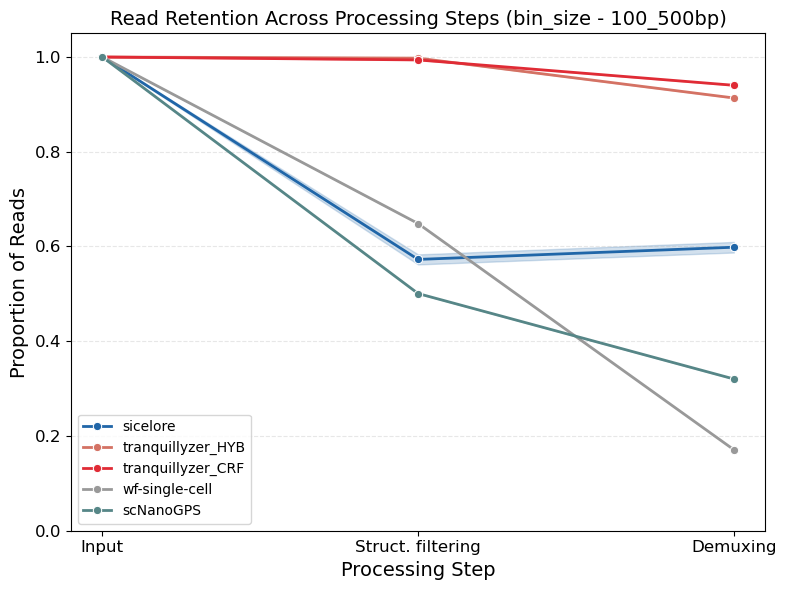

In [8]:
## plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_valid_summary_pd = combined_valid_summary.to_pandas()

combined_valid_sumamry_plt_df = pd.melt(
    combined_valid_summary_pd,
    id_vars=["sample_size"],
    value_vars=["sicelore_valid_reads_rate", "tranquillyzer_HYB_valid_reads_rate", "tranquillyzer_CRF_valid_reads_rate", "wf-single-cell_valid_reads_rate", "scNanoGPS_valid_reads_rate",
                "sicelore_demuxing_rate", "tranquillyzer_HYB_demuxing_rate", "tranquillyzer_CRF_demuxing_rate", "wf-single-cell_demuxing_rate", "scNanoGPS_demuxing_rate"],
    var_name="tool",
    value_name="proportion"
)

combined_valid_sumamry_plt_df["step"] = combined_valid_sumamry_plt_df["tool"].apply(lambda x: "Struct. filtering" if "valid_reads_rate" in x else "Demuxing")

# Clean up tool names by removing suffixes
combined_valid_sumamry_plt_df["tool"] = combined_valid_sumamry_plt_df["tool"].str.replace("_valid_reads_rate", "", regex=False)
combined_valid_sumamry_plt_df["tool"] = combined_valid_sumamry_plt_df["tool"].str.replace("_demuxing_rate", "", regex=False)

df = combined_valid_sumamry_plt_df.copy()

#  Step order and mapping
step_order = {"Input": 1, "Struct. filtering": 2, "Demuxing": 3}

# Add "Input" step with proportion 1.0 for all tool/sample combinations
tools = df["tool"].unique()
sample_sizes = df["sample_size"].unique()

input_rows = pd.DataFrame({
    "sample_size": np.repeat(sample_sizes, len(tools)),
    "tool": list(tools) * len(sample_sizes),
    "proportion": 1.0,
    "step": "Input"
})

df_aug = pd.concat([df, input_rows], ignore_index=True)
df_aug["step"] = pd.Categorical(df_aug["step"], categories=step_order, ordered=True)

custom_palette = {
    "scNanoGPS": "#568687",
    "tranquillyzer_HYB": "#d47264", 
    "tranquillyzer_CRF": "#e02b35",  # blue
    "sicelore": "#2066a8",       # orange
    "wf-single-cell": "#999999",      # green (add more if needed)
}

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_aug, x="step", 
             y="proportion", hue="tool",
               errorbar="sd", marker="o", 
               linewidth=2, palette=custom_palette)

# Formatting
plt.xlabel("Processing Step", fontsize=14)
plt.ylabel("Proportion of Reads", fontsize=14)
plt.title("Read Retention Across Processing Steps (bin_size - 100_500bp)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)
plt.legend(fontsize=10, title_fontsize=12, loc="lower left")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_bin_const.png", dpi=300, bbox_inches='tight')
# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_bin_const.svg", bbox_inches='tight')
# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_bin_const.pdf", bbox_inches='tight')

plt.show()

In [9]:
#### Longer reads

## tranquillyzer

bin_sizes = ["500_1000bp", "1000_1500bp", "1500_2000bp", "2000_2500bp"]

tranquillyzer_HYB_longer_valid_summary = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/tranquilizer/longer_valid_reads_HYB_summary.tsv", separator="\t")
tranquillyzer_HYB_longer_valid_summary = tranquillyzer_HYB_longer_valid_summary.with_columns(pl.col("sample_size").str.replace("_mil", "",literal=True).cast(pl.Int64).alias("sample_size"))
tranquillyzer_HYB_longer_valid_summary = tranquillyzer_HYB_longer_valid_summary.rename({"num_valid_reads":"tranquillyzer_HYB_valid_reads", 
                                                                                        "valid_reads_rate": "tranquillyzer_HYB_valid_reads_rate", 
                                                                                        "num_reads_demuxed" : "tranquillyzer_HYB_demuxed_reads",
                                                                                        "demuxing_rate": "tranquillyzer_HYB_demuxing_rate"})
                                                                                        
tranquillyzer_HYB_longer_valid_summary = tranquillyzer_HYB_longer_valid_summary.with_columns(
    pl.Series("bin_size", bin_sizes)
)

print(tranquillyzer_HYB_longer_valid_summary)

tranquillyzer_CRF_longer_valid_summary = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/tranquilizer/longer_valid_reads_CRF_summary.tsv", separator="\t")
tranquillyzer_CRF_longer_valid_summary = tranquillyzer_CRF_longer_valid_summary.with_columns(pl.col("sample_size").str.replace("_mil", "",literal=True).cast(pl.Int64).alias("sample_size"))
tranquillyzer_CRF_longer_valid_summary = tranquillyzer_CRF_longer_valid_summary.rename({"num_valid_reads":"tranquillyzer_CRF_valid_reads", 
                                                                                        "valid_reads_rate": "tranquillyzer_CRF_valid_reads_rate", 
                                                                                        "num_reads_demuxed" : "tranquillyzer_CRF_demuxed_reads",
                                                                                        "demuxing_rate": "tranquillyzer_CRF_demuxing_rate"})

tranquillyzer_CRF_longer_valid_summary = tranquillyzer_CRF_longer_valid_summary.with_columns(
    pl.Series("bin_size", bin_sizes)
)
print(tranquillyzer_CRF_longer_valid_summary)



shape: (4, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ sample_siz ┆ tranquilly ┆ tranquilly ┆ tranquill ┆ tranquill ┆ demuxing_ ┆ aligned_r ┆ bin_size  │
│ …          ┆ …          ┆ …          ┆ y…        ┆ y…        ┆ a…        ┆ e…        ┆ ---       │
│ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ str       │
│ i64        ┆ i64        ┆ f64        ┆ i64       ┆ f64       ┆ f64       ┆ i64       ┆           │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 10         ┆ 9967812    ┆ 0.9967812  ┆ 9131176   ┆ 0.9131176 ┆ 0.999389  ┆ 8800238   ┆ 500_1000b │
│            ┆            ┆            ┆           ┆           ┆           ┆           ┆ p         │
│ 10         ┆ 9924251    ┆ 0.9924251  ┆ 9095867   ┆ 0.9095867 ┆ 0.999325  ┆ 9075170   ┆ 1000_1500 │
│            ┆            ┆            ┆           ┆           ┆           ┆ 

In [10]:
## sicelore

sicelore_longer_valid_reads_summary = [("500_1000bp", 5395121, 5632716), ("1000_1500bp", 5801861, 6056652),  
                                       ("1500_2000bp", 5801358, 6065750), ("2000_2500bp", 5815468, 6069335)]

sicelore_longer_valid_reads_summary_df = pl.DataFrame(sicelore_longer_valid_reads_summary, ["bin_size", "sicelore_valid_reads", "sicelore_demuxed_reads"])

sicelore_longer_valid_reads_summary_df = sicelore_longer_valid_reads_summary_df.with_columns(
    (pl.col("sicelore_valid_reads") /10000000).alias("sicelore_valid_reads_rate")
)

sicelore_longer_valid_reads_summary_df = sicelore_longer_valid_reads_summary_df.with_columns(
    (pl.col("sicelore_demuxed_reads") /10000000).alias("sicelore_demuxing_rate")
)

print(sicelore_longer_valid_reads_summary_df)

shape: (4, 5)
┌─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ bin_size    ┆ sicelore_v… ┆ sicelore_d… ┆ sicelore_v… ┆ sicelore_d… │
│ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---         │
│ str         ┆ i64         ┆ i64         ┆ f64         ┆ f64         │
╞═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 500_1000bp  ┆ 5395121     ┆ 5632716     ┆ 0.539512    ┆ 0.5632716   │
│ 1000_1500b… ┆ 5801861     ┆ 6056652     ┆ 0.580186    ┆ 0.6056652   │
│ 1500_2000b… ┆ 5801358     ┆ 6065750     ┆ 0.5801358   ┆ 0.606575    │
│ 2000_2500b… ┆ 5815468     ┆ 6069335     ┆ 0.581547    ┆ 0.6069335   │
└─────────────┴─────────────┴─────────────┴─────────────┴─────────────┘


/varidata/research/projects/shen/tools/ayush/mambaforge/envs/tranquilizer/lib/python3.10/functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


In [11]:
## wf-single-cell

wfsc_longer_valid_reads_summary = wfsc_summary.filter(pl.col("SAMPLE").is_in(bin_sizes))
wfsc_longer_valid_reads_summary = wfsc_longer_valid_reads_summary.with_columns(pl.col("SAMPLE").alias("bin_size"))

wfsc_longer_valid_reads_summary = wfsc_longer_valid_reads_summary.with_columns(((pl.col("full_len_reads"))/10000000).alias("wf-single-cell_valid_reads_rate"))
wfsc_longer_valid_reads_summary = wfsc_longer_valid_reads_summary.with_columns(((pl.col("reads_w_valid_barcodes"))/10000000).alias("wf-single-cell_demuxing_rate"))

print(wfsc_longer_valid_reads_summary)

shape: (4, 10)
┌─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬─────────┬────────┐
│ SAMPLE  ┆ DURATIO ┆ full_le ┆ non_ful ┆ reads_w ┆ Duratio ┆ max_rss ┆ bin_siz ┆ wf-sing ┆ wf-sin │
│ ---     ┆ N(h…    ┆ n_r…    ┆ l_l…    ┆ _va…    ┆ n(s…    ┆ (GB…    ┆ e       ┆ le-…    ┆ gle-…  │
│ str     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---    │
│         ┆ str     ┆ i64     ┆ i64     ┆ i64     ┆ i64     ┆ f64     ┆ str     ┆ f64     ┆ f64    │
╞═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪════════╡
│ 500_100 ┆ 00:24:5 ┆ 6333272 ┆ 3666728 ┆ 4288348 ┆ 1495    ┆ 16.9    ┆ 500_100 ┆ 0.63332 ┆ 0.4288 │
│ 0bp     ┆ 5       ┆         ┆         ┆         ┆         ┆         ┆ 0bp     ┆ 72      ┆ 35     │
│ 1000_15 ┆ 00:41:0 ┆ 6190720 ┆ 3809280 ┆ 4783775 ┆ 2462    ┆ 17.3    ┆ 1000_15 ┆ 0.61907 ┆ 0.4783 │
│ 00b…    ┆ 2       ┆         ┆         ┆         ┆         ┆         ┆ 00b…

In [12]:
## scNanoGPS
scNanoGPS_longer_valid_reads_summary = scNanoGPS_summary.filter(pl.col("dataset").is_in(bin_sizes))
scNanoGPS_longer_valid_reads_summary = scNanoGPS_longer_valid_reads_summary.with_columns(pl.col("dataset").alias("bin_size"))

scNanoGPS_longer_valid_reads_summary = scNanoGPS_longer_valid_reads_summary.with_columns(((pl.col("n_reads_correct_architecture"))/10000000).alias("scNanoGPS_valid_reads_rate"))
scNanoGPS_longer_valid_reads_summary = scNanoGPS_longer_valid_reads_summary.with_columns(((pl.col("n_reads_assigned_corrected_CB"))/10000000).alias("scNanoGPS_demuxing_rate"))

print(scNanoGPS_longer_valid_reads_summary)

shape: (4, 6)
┌─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ dataset     ┆ n_reads_co… ┆ n_reads_as… ┆ bin_size    ┆ scNanoGPS_… ┆ scNanoGPS_… │
│ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ ---         │
│ str         ┆ i64         ┆ i64         ┆ str         ┆ f64         ┆ f64         │
╞═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 500_1000bp  ┆ 5009618     ┆ 3197302     ┆ 500_1000bp  ┆ 0.5009618   ┆ 0.31973     │
│ 1000_1500b… ┆ 5021666     ┆ 3207175     ┆ 1000_1500b… ┆ 0.5021666   ┆ 0.3207175   │
│ 1500_2000b… ┆ 5015614     ┆ 3205418     ┆ 1500_2000b… ┆ 0.501561    ┆ 0.3205418   │
│ 2000_2500b… ┆ 4994750     ┆ 2168042     ┆ 2000_2500b… ┆ 0.499475    ┆ 0.2168042   │
└─────────────┴─────────────┴─────────────┴─────────────┴─────────────┴─────────────┘


In [13]:
## combined

pl.Config.set_fmt_str_lengths(10)  # Increase max string length
pl.Config.set_tbl_cols(100)          # Ensure enough column width
pl.Config.set_tbl_rows(100) 

combined_longer_valid_reads_summary = tranquillyzer_HYB_longer_valid_summary.join(tranquillyzer_CRF_longer_valid_summary, on="bin_size", how="inner")\
    .join(sicelore_longer_valid_reads_summary_df, on="bin_size", how="inner")\
        .join(wfsc_longer_valid_reads_summary, on="bin_size", how="inner")\
            .join(scNanoGPS_longer_valid_reads_summary, on="bin_size", how="inner")
print(combined_longer_valid_reads_summary)


shape: (4, 33)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ sam ┆ tra ┆ tra ┆ tra ┆ tra ┆ dem ┆ ali ┆ bin ┆ sam ┆ tra ┆ tra ┆ tra ┆ tra ┆ dem ┆ ali ┆ sic ┆ sic ┆ sic ┆ sic ┆ SAM ┆ DUR ┆ ful ┆ non ┆ rea ┆ Dur ┆ max ┆ wf- ┆ wf- ┆ dat ┆ n_r ┆ n_r ┆ scN ┆ scN │
│ ple ┆ nqu ┆ nqu ┆ nqu ┆ nqu ┆ uxi ┆ gne ┆ _si ┆ ple ┆ nqu ┆ nqu ┆ nqu ┆ nqu ┆ uxi ┆ gne ┆ elo ┆ elo ┆ elo ┆ elo ┆ PLE ┆ ATI ┆ l_l ┆ _fu ┆ ds_ ┆ ati ┆ _rs ┆ sin ┆ sin ┆ ase ┆ ead ┆ ead ┆ ano ┆ ano │
│ _si ┆ ill ┆ ill ┆ ill ┆ ill ┆ ng_ ┆ d_r ┆ ze  ┆ _si ┆ ill ┆ ill ┆ ill ┆ ill ┆ ng_ ┆ d_r ┆ re_ ┆ re_ ┆ re_ ┆ re_ ┆ --- ┆ ON( ┆ en_ ┆ ll_ ┆ w_v ┆ on( ┆ s(G ┆ gle ┆ gle ┆ t   ┆ s_c ┆ s_a ┆ GPS ┆ GPS │
│ z…  ┆ y…  ┆ y…  ┆ y…  ┆ y…  ┆ a…  ┆ e…  ┆ --- ┆ z…  ┆ y…  ┆ y…  ┆ y…  ┆ y…  ┆ a…  ┆ e…  ┆ v…  ┆ d…  ┆ v…  ┆ d…  ┆ str ┆ h…  ┆ r…  ┆ l…  ┆ a…  ┆ s…  ┆ B…  ┆ -…  ┆ -…  ┆ --- ┆ o…  ┆ s… 

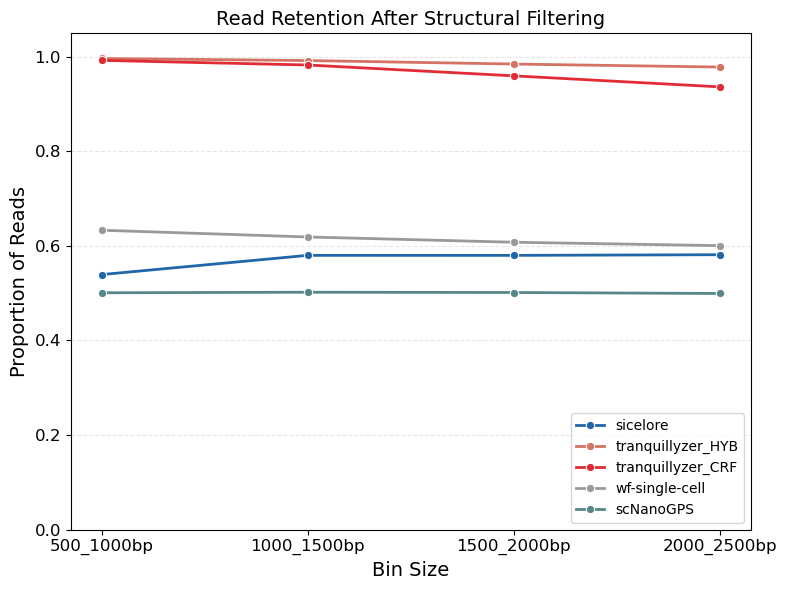

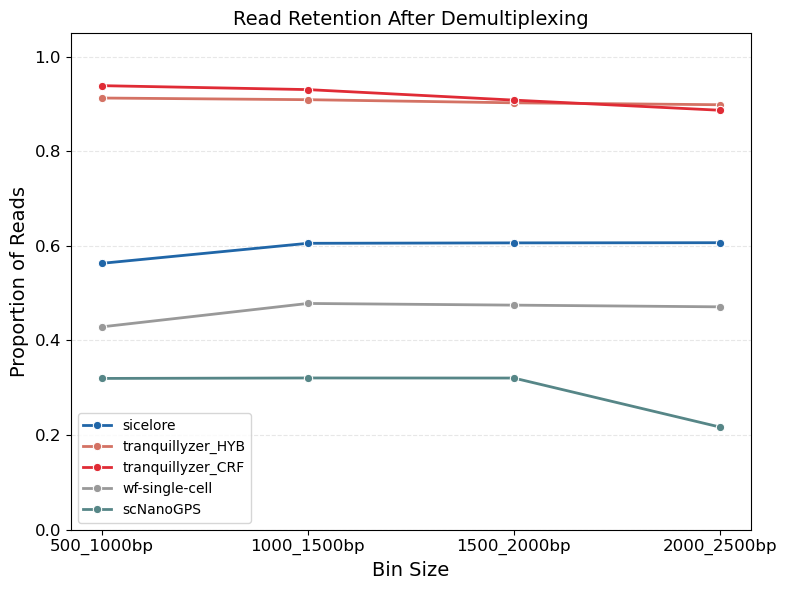

In [14]:
## plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


################ Structural filtering ############

combined_longer_valid_summary_pd = combined_longer_valid_reads_summary.to_pandas()

combined_longer_valid_sumamry_plt_df = pd.melt(
    combined_longer_valid_summary_pd,
    id_vars=["bin_size"],
    value_vars=["sicelore_valid_reads_rate", "tranquillyzer_HYB_valid_reads_rate", "tranquillyzer_CRF_valid_reads_rate", "wf-single-cell_valid_reads_rate", "scNanoGPS_valid_reads_rate"],
    var_name="tool",
    value_name="proportion"
)


combined_longer_valid_sumamry_plt_df["tool"] = combined_longer_valid_sumamry_plt_df["tool"].str.replace("_valid_reads_rate", "", regex=False)

custom_palette = {
    "scNanoGPS": "#568687",
    "tranquillyzer_HYB": "#d47264", 
    "tranquillyzer_CRF": "#e02b35",  # blue
    "sicelore": "#2066a8",       # orange
    "wf-single-cell": "#999999",      # green (add more if needed)
}

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=combined_longer_valid_sumamry_plt_df, x="bin_size", 
             y="proportion", hue="tool", marker="o", 
             linewidth=2, palette=custom_palette)

# Formatting
plt.xlabel("Bin Size", fontsize=14)
plt.ylabel("Proportion of Reads", fontsize=14)
plt.title("Read Retention After Structural Filtering", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)
plt.legend(fontsize=10, title_fontsize=12, loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_struct_filt_25M.png", dpi=300, bbox_inches='tight')
# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_struct_filt_25M.svg", bbox_inches='tight')
# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_struct_filt_25M.pdf", bbox_inches='tight')

plt.show()

############### Demuxing ##################

combined_longer_valid_summary_pd = combined_longer_valid_reads_summary.to_pandas()

combined_longer_valid_sumamry_plt_df = pd.melt(
    combined_longer_valid_summary_pd,
    id_vars=["bin_size"],
    value_vars=["sicelore_demuxing_rate", "tranquillyzer_HYB_demuxing_rate", "tranquillyzer_CRF_demuxing_rate", "wf-single-cell_demuxing_rate", "scNanoGPS_demuxing_rate"],
    var_name="tool",
    value_name="proportion"
)


combined_longer_valid_sumamry_plt_df["tool"] = combined_longer_valid_sumamry_plt_df["tool"].str.replace("_demuxing_rate", "", regex=False)

custom_palette = {
    "scNanoGPS": "#568687",
    "tranquillyzer_HYB": "#d47264", 
    "tranquillyzer_CRF": "#e02b35",  # blue
    "sicelore": "#2066a8",       # orange
    "wf-single-cell": "#999999",      # green (add more if needed)
}

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=combined_longer_valid_sumamry_plt_df, x="bin_size", 
             y="proportion", hue="tool", marker="o", 
             linewidth=2, palette=custom_palette)

# Formatting
plt.xlabel("Bin Size", fontsize=14)
plt.ylabel("Proportion of Reads", fontsize=14)
plt.title("Read Retention After Demultiplexing", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)
plt.legend(fontsize=10, title_fontsize=12, loc="lower left")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_denuxing_25M.png", dpi=300, bbox_inches='tight')
# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_denuxing_25M.svg", bbox_inches='tight')
# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_denuxing_25M.pdf", bbox_inches='tight')

plt.show()

In [15]:
## All the valid samples together

all_valid_samples_summary_dict = {
    "tool": ["tranquillyzer_HYB"] * 5 + ["tranquillyzer_CRF"] * 5 + ["sicelore"] * 5 + ["wf-single-cell"] * 5 + ["scNanoGPS"] * 5 +
            ["tranquillyzer_HYB"] * 5 + ["tranquillyzer_CRF"] * 5 + ["sicelore"] * 5 + ["wf-single-cell"] * 5 + ["scNanoGPS"] * 5 +
            ["tranquillyzer_HYB"] * 4 + ["tranquillyzer_CRF"] * 4 + ["sicelore"] * 4 + ["wf-single-cell"] * 4 + ["scNanoGPS"] * 4 +
            ["tranquillyzer_HYB"] * 4 + ["tranquillyzer_CRF"] * 4 + ["sicelore"] * 4 + ["wf-single-cell"] * 4 + ["scNanoGPS"] * 4,

    "proportion": 
        tranquillyzer_HYB_valid_summary["tranquillyzer_HYB_valid_reads_rate"].to_list() +
        tranquillyzer_CRF_valid_summary["tranquillyzer_CRF_valid_reads_rate"].to_list() +
        sicelore_valid_summary_df["sicelore_valid_reads_rate"].to_list() +
        wfsc_valid_summary["wf-single-cell_valid_reads_rate"].to_list() +
        scNanoGPS_valid_summary["scNanoGPS_valid_reads_rate"].to_list() +
        tranquillyzer_HYB_valid_summary["tranquillyzer_HYB_demuxing_rate"].to_list() +
        tranquillyzer_CRF_valid_summary["tranquillyzer_CRF_demuxing_rate"].to_list() +
        sicelore_valid_summary_df["sicelore_demuxing_rate"].to_list() +
        wfsc_valid_summary["wf-single-cell_demuxing_rate"].to_list() +
        scNanoGPS_valid_summary["scNanoGPS_demuxing_rate"].to_list() +
        tranquillyzer_HYB_longer_valid_summary["tranquillyzer_HYB_valid_reads_rate"].to_list() +
        tranquillyzer_CRF_longer_valid_summary["tranquillyzer_CRF_valid_reads_rate"].to_list() +
        sicelore_longer_valid_reads_summary_df["sicelore_valid_reads_rate"].to_list() +
        wfsc_longer_valid_reads_summary["wf-single-cell_valid_reads_rate"].to_list() +
        scNanoGPS_longer_valid_reads_summary["scNanoGPS_valid_reads_rate"].to_list() +
        tranquillyzer_HYB_longer_valid_summary["tranquillyzer_HYB_demuxing_rate"].to_list() +
        tranquillyzer_CRF_longer_valid_summary["tranquillyzer_CRF_demuxing_rate"].to_list() +
        sicelore_longer_valid_reads_summary_df["sicelore_demuxing_rate"].to_list() +
        wfsc_longer_valid_reads_summary["wf-single-cell_demuxing_rate"].to_list() +
        scNanoGPS_longer_valid_reads_summary["scNanoGPS_demuxing_rate"].to_list(),

    "step": ["Struct. filtering"] * 25 + ["Demuxing"] * 25 + ["Struct. filtering"] * 20 + ["Demuxing"] * 20
}

all_valid_samples_summary_df = pl.DataFrame(all_valid_samples_summary_dict)
print(all_valid_samples_summary_df)

shape: (90, 3)
┌─────────────┬────────────┬─────────────┐
│ tool        ┆ proportion ┆ step        │
│ ---         ┆ ---        ┆ ---         │
│ str         ┆ f64        ┆ str         │
╞═════════════╪════════════╪═════════════╡
│ tranquilly… ┆ 0.997677   ┆ Struct. fi… │
│ tranquilly… ┆ 0.997649   ┆ Struct. fi… │
│ tranquilly… ┆ 0.997614   ┆ Struct. fi… │
│ tranquilly… ┆ 0.997675   ┆ Struct. fi… │
│ tranquilly… ┆ 0.997648   ┆ Struct. fi… │
│ tranquilly… ┆ 0.9939246  ┆ Struct. fi… │
│ tranquilly… ┆ 0.993829   ┆ Struct. fi… │
│ tranquilly… ┆ 0.993823   ┆ Struct. fi… │
│ tranquilly… ┆ 0.993871   ┆ Struct. fi… │
│ tranquilly… ┆ 0.993846   ┆ Struct. fi… │
│ sicelore    ┆ 0.5815892  ┆ Struct. fi… │
│ sicelore    ┆ 0.560117   ┆ Struct. fi… │
│ sicelore    ┆ 0.562407   ┆ Struct. fi… │
│ sicelore    ┆ 0.581379   ┆ Struct. fi… │
│ sicelore    ┆ 0.57818    ┆ Struct. fi… │
│ wf-single-… ┆ 0.6486388  ┆ Struct. fi… │
│ wf-single-… ┆ 0.648971   ┆ Struct. fi… │
│ wf-single-… ┆ 0.648054   ┆ Struct. fi

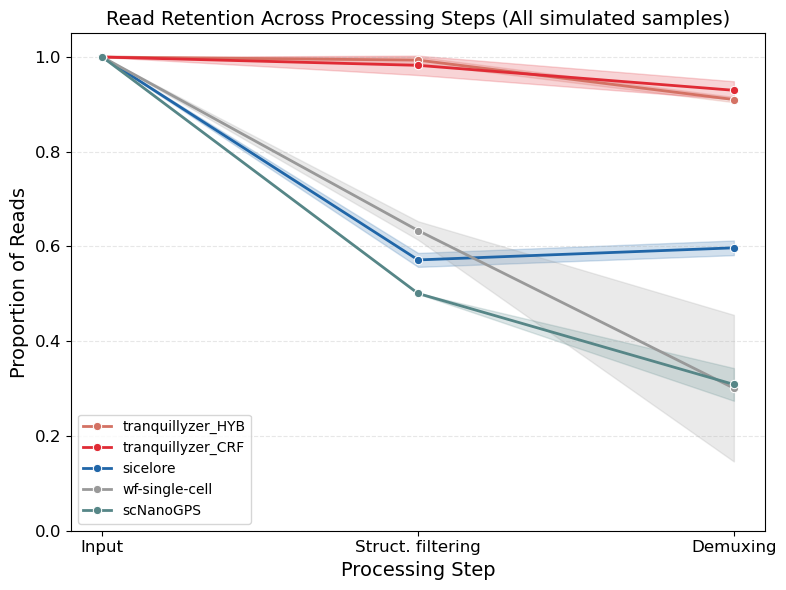

In [16]:
all_valid_samples_summary_pd = all_valid_samples_summary_df.to_pandas()

df = all_valid_samples_summary_pd.copy()

#  Step order and mapping
step_order = {"Input": 1, "Struct. filtering": 2, "Demuxing": 3}

# Add "Input" step with proportion 1.0 for all tool/sample combinations
tools = df["tool"].unique()

input_rows = pd.DataFrame({
    "tool": list(tools) * len(sample_sizes),
    "proportion": 1.0,
    "step": "Input"
})

df_aug = pd.concat([df, input_rows], ignore_index=True)
df_aug["step"] = pd.Categorical(df_aug["step"], categories=step_order, ordered=True)

custom_palette = {
    "scNanoGPS": "#568687",
    "tranquillyzer_HYB": "#d47264", 
    "tranquillyzer_CRF": "#e02b35",  # blue
    "sicelore": "#2066a8",       # orange
    "wf-single-cell": "#999999",      # green (add more if needed)
}

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_aug, x="step", 
             y="proportion", hue="tool",
               errorbar="sd", marker="o", 
               linewidth=2, palette=custom_palette)

# Formatting
plt.xlabel("Processing Step", fontsize=14)
plt.ylabel("Proportion of Reads", fontsize=14)
plt.title("Read Retention Across Processing Steps (All simulated samples)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)
plt.legend(fontsize=10, title_fontsize=12, loc="lower left")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_bin_const_all_samples.png", dpi=300, bbox_inches='tight')
# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_bin_const_all_samples.svg", bbox_inches='tight')
# plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/figure2/read_retention_bin_const_all_samples.pdf", bbox_inches='tight')

plt.show()

In [17]:

sicelore_5M_pos = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/sicelore/benchmarking/benchmark_results/positions.100_500bp_005M.tsv.gz", separator="\t")
print(sicelore_5M_pos.head())

######## failing #########

tranquillyzer_5M_valid_meta = pl.read_parquet("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/tranquilizer/simulated/10x3p_sc/100_500bp/5_mil/CRF/annotations_valid.parquet")
sicelore_failing_reads = tranquillyzer_5M_valid_meta.filter(~pl.col("ReadName").is_in(list(sicelore_5M_pos["name"])))
sicelore_failing_reads_fwd = sicelore_failing_reads.filter(sicelore_failing_reads["orientation"] == "+")


print(f'Min polyA length in reads failed by Sicelore: {sicelore_failing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_lengths"].min()}')
print(f'Mean polyA length in reads failed by Sicelore: {sicelore_failing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_lengths"].mean()}')
print(f'Median polyA length in reads failed by Sicelore: {sicelore_failing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_lengths"].median()}')
print(f'Max polyA length in reads failed by Sicelore: {sicelore_failing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_lengths"].max()}')

print(f'\n\nMin polyA End in reads failed by Sicelore: {sicelore_failing_reads_fwd.with_columns(pl.col("polyA_Ends").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_Ends"].min()}')
print(f'Mean polyA End in reads failed by Sicelore: {sicelore_failing_reads_fwd.with_columns(pl.col("polyA_Ends").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_Ends"].mean()}')
print(f'Median polyA End in reads failed by Sicelore: {sicelore_failing_reads_fwd.with_columns(pl.col("polyA_Ends").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_Ends"].median()}')
print(f'Max polyA End in reads failed by Sicelore: {sicelore_failing_reads_fwd.with_columns(pl.col("polyA_Ends").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_Ends"].max()}')

########## passing #######

sicelore_passing_reads = tranquillyzer_5M_valid_meta.filter(pl.col("ReadName").is_in(list(sicelore_5M_pos["name"])))
sicelore_passing_reads_fwd = sicelore_passing_reads.filter(sicelore_passing_reads["orientation"] == "+")

print(f'\n\nMin polyA length in reads passed by Sicelore: {sicelore_passing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_lengths"].min()}')
print(f'Mean polyA length in reads passed by Sicelore: {sicelore_passing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_lengths"].mean()}')
print(f'Median polyA length in reads passed by Sicelore: {sicelore_passing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_lengths"].median()}')
print(f'Max polyA length in reads passed by Sicelore: {sicelore_passing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_lengths"].max()}')

print(f'\n\nMin polyA End in reads passed by Sicelore: {sicelore_passing_reads_fwd.with_columns(pl.col("polyA_Ends").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_Ends"].min()}')
print(f'Mean polyA End in reads passed by Sicelore: {sicelore_passing_reads_fwd.with_columns(pl.col("polyA_Ends").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_Ends"].mean()}')
print(f'Median polyA End in reads passed by Sicelore: {sicelore_passing_reads_fwd.with_columns(pl.col("polyA_Ends").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_Ends"].median()}')
print(f'Max polyA End in reads passed by Sicelore: {sicelore_passing_reads_fwd.with_columns(pl.col("polyA_Ends").cast(pl.Float32)).filter(pl.col("polyA_lengths").is_not_null())["polyA_Ends"].max()}')


shape: (5, 8)
┌─────────────┬────────┬─────────────┬───────────┬─────────────┬─────────┬──────────┬────────┐
│ name        ┆ strand ┆ polyA_star… ┆ polyA_end ┆ adapter_en… ┆ tso_end ┆ bc_start ┆ bc_end │
│ ---         ┆ ---    ┆ ---         ┆ ---       ┆ ---         ┆ ---     ┆ ---      ┆ ---    │
│ str         ┆ str    ┆ i64         ┆ i64       ┆ i64         ┆ str     ┆ str      ┆ str    │
╞═════════════╪════════╪═════════════╪═══════════╪═════════════╪═════════╪══════════╪════════╡
│ chunk41_re… ┆ REV    ┆ 330         ┆ 382       ┆ 411         ┆ 61      ┆ 410      ┆ 395    │
│ chunk41_re… ┆ FWD    ┆ 330         ┆ 382       ┆ 411         ┆ None    ┆ 410      ┆ 395    │
│ chunk41_re… ┆ REV    ┆ 207         ┆ 230       ┆ 255         ┆ 29      ┆ 254      ┆ 239    │
│ chunk41_re… ┆ FWD    ┆ 207         ┆ 230       ┆ 255         ┆ None    ┆ 254      ┆ 239    │
│ chunk41_re… ┆ REV    ┆ 248         ┆ 268       ┆ 295         ┆ 95      ┆ 295      ┆ 280    │
└─────────────┴────────┴────────────

In [ ]:
print(sicelore_failing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32))\
    .filter((pl.col("polyA_lengths")\
             .is_not_null() & (pl.col("polyA_lengths") <= 15))).shape[0])
print(sicelore_failing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32))\
    .filter((pl.col("polyA_lengths")\
             .is_not_null() & (pl.col("polyA_lengths") <= 15))).shape[0]/sicelore_failing_reads_fwd.shape[0])

print(sicelore_failing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32))\
    .filter((pl.col("polyA_lengths")\
             .is_null())).shape[0])
print(sicelore_failing_reads_fwd.with_columns(pl.col("polyA_lengths").cast(pl.Float32))\
    .filter((pl.col("polyA_lengths")\
             .is_null())).shape[0]/sicelore_failing_reads_fwd.shape[0])

print(sicelore_failing_reads_fwd.with_columns(pl.col("polyA_Starts").cast(pl.Float32))\
    .filter((pl.col("polyA_Starts") > 95)).shape[0])
print(sicelore_failing_reads_fwd.with_columns(pl.col("polyA_Starts").cast(pl.Float32))\
    .filter((pl.col("polyA_Starts") > 95)).shape[0]/sicelore_failing_reads_fwd.shape[0])

print(sicelore_passing_reads_fwd.with_columns(pl.col("polyA_Starts").cast(pl.Float32))\
    .filter((pl.col("polyA_Starts") > 95)).shape[0])
print(sicelore_passing_reads_fwd.with_columns(pl.col("polyA_Starts").cast(pl.Float32))\
    .filter((pl.col("polyA_Starts") > 95)).shape[0]/sicelore_passing_reads_fwd.shape[0])

534825
0.6066361623549268
57959
0.0657411776448917
288193
0.3268887870566137
580308
0.361579513061358


: 

: 

: 

: 

: 

In [ ]:
tranquillyzer_5M_valid_meta.columns

['ReadName',
 'read_length',
 'cDNA_Starts',
 'cDNA_Ends',
 'cDNA_length',
 'UMI_Starts',
 'UMI_Ends',
 'random_s_Starts',
 'random_s_Ends',
 'random_e_Starts',
 'random_e_Ends',
 'polyA_Starts',
 'polyA_Ends',
 'polyA_lengths',
 'corrected_CBC',
 'corrected_CBC_min_dist',
 'corrected_CBC_counts_with_min_dist',
 'CBC_Starts',
 'CBC_Ends',
 'architecture',
 'reason',
 'orientation',
 'cell_id']

: 

: 

: 

: 

: 

In [1]:
## Speed and memory

import polars as pl

pl.Config.set_fmt_str_lengths(100)  # Increase max string length
pl.Config.set_tbl_cols(100)          # Ensure enough column width
pl.Config.set_tbl_rows(100) 

time_mem_100_500bp = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/tranquilizer/time_and_memory_summary_100_500bp.tsv", separator="\t")
time_mem_100_500bp = time_mem_100_500bp.with_columns((pl.col("preprocess_fasta_time")\
     + pl.col("annotate_demux_time")\
         + pl.col("align_time")\
             + pl.col("dedup_time")).alias("total_time"))
time_mem_100_500bp = time_mem_100_500bp.with_columns(
    (pl.lit("tranquillyzer_") + pl.col("approach")).alias("tool")
)
time_mem_100_500bp = time_mem_100_500bp.select(["sample_size", "total_time", "tool"])

time_mem_500_2500bp = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/tranquilizer/time_and_memory_summary_500_2500bp.tsv", separator="\t")
time_mem_500_2500bp = time_mem_500_2500bp.with_columns((pl.col("preprocess_fasta_time")\
     + pl.col("annotate_demux_time")\
         + pl.col("align_time")\
             + pl.col("dedup_time")).alias("total_time"))
time_mem_500_2500bp = time_mem_500_2500bp.with_columns(
    (pl.lit("tranquillyzer_") + pl.col("approach")).alias("tool")
)
time_mem_500_2500bp = time_mem_500_2500bp.select(["bin_size", "total_time", "tool"])

sicelore_times = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/sicelore/benchmarking/benchmark_results/benchmarking_results.tsv", separator="\t")
scNanoGPS_times = pl.read_csv("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/scNanoGPS_benchmark_times_latest.txt", separator="\t")
wfsc_times = pl.read_csv("/varidata/research/projects/shen/projects/2025_03_12_tranquilizer_benchmarking/wf_single_cell/METRICS.txt", separator="\t")


In [3]:
## variable sample size

sicelore_times = sicelore_times.with_columns(((pl.col("t_step_1")\
     + pl.col("t_step_2")\
         + pl.col("t_step_3"))/60).alias("total_time"))
sicelore_times_var_ss = sicelore_times.with_columns(pl.lit("sicelore").alias("tool"))
sicelore_times_var_ss = sicelore_times_var_ss.head(5)
sicelore_times_var_ss = sicelore_times_var_ss.with_columns((time_mem_100_500bp["sample_size"]).head(5).alias("sample_size"))
sicelore_times_var_ss = sicelore_times_var_ss.select(["sample_size", "total_time", "tool"]).head(5)

scNanoGPS_times_var_ss = scNanoGPS_times.head(5)
scNanoGPS_times_var_ss = scNanoGPS_times_var_ss.rename({"data":"sample_size", "minutes":"total_time"})
scNanoGPS_times_var_ss = scNanoGPS_times_var_ss.with_columns(pl.lit("scNanoGPS").alias("tool"))
scNanoGPS_times_var_ss = scNanoGPS_times_var_ss.select(["sample_size", "total_time", "tool"])

wfsc_times_var_ss = wfsc_times[[0,3,6,9,12]]
wfsc_times_var_ss = wfsc_times_var_ss.rename({"SAMPLE":"sample_size", "Duration(second)":"total_time"})
wfsc_times_var_ss = wfsc_times_var_ss.select(["sample_size", "total_time"])
wfsc_times_var_ss = wfsc_times_var_ss.with_columns(pl.lit("wf-single-cell").alias("tool"))
wfsc_times_var_ss = wfsc_times_var_ss.with_columns(
    (pl.col("total_time") / 60).alias("total_time")
)
print(time_mem_100_500bp.head())
print(time_mem_500_2500bp.head())
print(sicelore_times_var_ss.head())
print(scNanoGPS_times_var_ss.head())
print(wfsc_times_var_ss.head())

shape: (5, 3)
┌─────────────┬────────────┬───────────────────┐
│ sample_size ┆ total_time ┆ tool              │
│ ---         ┆ ---        ┆ ---               │
│ str         ┆ f64        ┆ str               │
╞═════════════╪════════════╪═══════════════════╡
│ 5_mil       ┆ 11.611233  ┆ tranquillyzer_HYB │
│ 25_mil      ┆ 39.480667  ┆ tranquillyzer_HYB │
│ 50_mil      ┆ 72.568417  ┆ tranquillyzer_HYB │
│ 75_mil      ┆ 106.7491   ┆ tranquillyzer_HYB │
│ 100_mil     ┆ 138.544767 ┆ tranquillyzer_HYB │
└─────────────┴────────────┴───────────────────┘
shape: (5, 3)
┌─────────────┬────────────┬───────────────────┐
│ bin_size    ┆ total_time ┆ tool              │
│ ---         ┆ ---        ┆ ---               │
│ str         ┆ f64        ┆ str               │
╞═════════════╪════════════╪═══════════════════╡
│ 500_1000bp  ┆ 40.918117  ┆ tranquillyzer_HYB │
│ 1000_1500bp ┆ 62.204267  ┆ tranquillyzer_HYB │
│ 1500_2000bp ┆ 81.99355   ┆ tranquillyzer_HYB │
│ 2000_2500bp ┆ 101.951583 ┆ tranquillyze

shape: (25, 4)
┌─────────────┬────────────┬───────────────────┬─────────────────────┐
│ sample_size ┆ total_time ┆ tool              ┆ sample_size_numeric │
│ ---         ┆ ---        ┆ ---               ┆ ---                 │
│ str         ┆ f64        ┆ str               ┆ i32                 │
╞═════════════╪════════════╪═══════════════════╪═════════════════════╡
│ 5_mil       ┆ 11.611233  ┆ tranquillyzer_HYB ┆ 5                   │
│ 25_mil      ┆ 39.480667  ┆ tranquillyzer_HYB ┆ 25                  │
│ 50_mil      ┆ 72.568417  ┆ tranquillyzer_HYB ┆ 50                  │
│ 75_mil      ┆ 106.7491   ┆ tranquillyzer_HYB ┆ 75                  │
│ 100_mil     ┆ 138.544767 ┆ tranquillyzer_HYB ┆ 100                 │
│ 5_mil       ┆ 14.424767  ┆ tranquillyzer_CRF ┆ 5                   │
│ 25_mil      ┆ 59.621717  ┆ tranquillyzer_CRF ┆ 25                  │
│ 50_mil      ┆ 122.232233 ┆ tranquillyzer_CRF ┆ 50                  │
│ 75_mil      ┆ 168.682383 ┆ tranquillyzer_CRF ┆ 75           

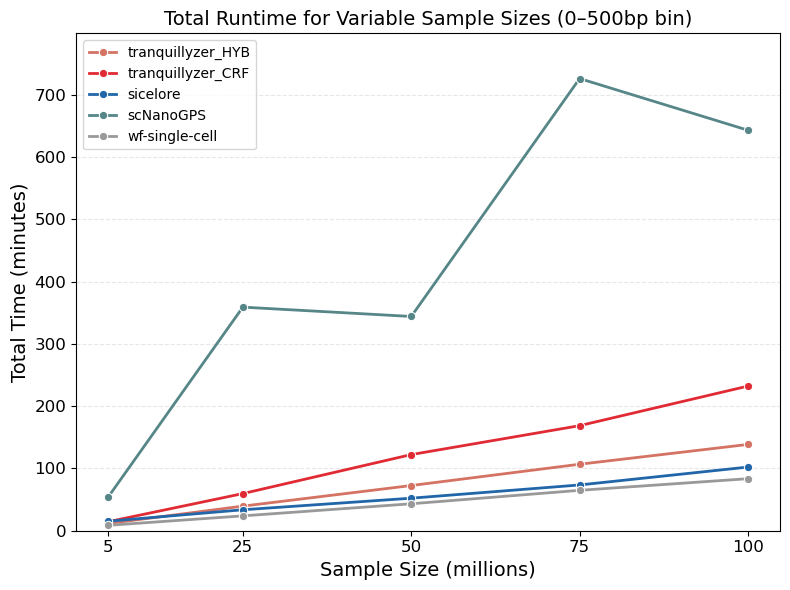

In [4]:
## plot variable sample sizes

import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure consistent dtypes before concatenation
sicelore_times_var_ss = sicelore_times_var_ss.with_columns([
    pl.col("sample_size").cast(pl.Utf8),
    pl.col("total_time").cast(pl.Float64)
])

scNanoGPS_times_var_ss = scNanoGPS_times_var_ss.with_columns([
    pl.col("sample_size").cast(pl.Utf8),
    pl.col("total_time").cast(pl.Float64)
])

wfsc_times_var_ss = wfsc_times_var_ss.with_columns([
    pl.col("sample_size").cast(pl.Utf8),
    pl.col("total_time").cast(pl.Float64)
])

tranquillyzer_times_var_ss = time_mem_100_500bp.select(["sample_size", "total_time", "tool"]).with_columns(
    pl.col("sample_size").cast(pl.Utf8)
)

# Combine DataFrames
combined_times_var_ss = pl.concat([
    tranquillyzer_times_var_ss,
    sicelore_times_var_ss,
    scNanoGPS_times_var_ss,
    wfsc_times_var_ss
])

# Convert sample_size to numeric
combined_times_var_ss = combined_times_var_ss.with_columns(
    pl.col("sample_size")
    .str.strip_chars("_mil")
    .cast(pl.Int32)
    .alias("sample_size_numeric")
)

# Check data
print(combined_times_var_ss)

# Convert to pandas
df_plot = combined_times_var_ss.to_pandas()

# Sort for plotting
# df_plot = df_plot.sort_values(by="sample_size_numeric")

# Custom color palette
custom_palette = {
    "scNanoGPS": "#568687",
    "tranquillyzer_HYB": "#d47264",
    "tranquillyzer_CRF": "#e02b35",
    "sicelore": "#2066a8",
    "wf-single-cell": "#999999"
}

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df_plot,
    x="sample_size_numeric", y="total_time",
    hue="tool", marker="o", linewidth=2,
    palette=custom_palette
)

plt.xlabel("Sample Size (millions)", fontsize=14)
plt.ylabel("Total Time (minutes)", fontsize=14)
plt.title("Total Runtime for Variable Sample Sizes (0–500bp bin)", fontsize=14)
plt.xticks(df_plot["sample_size_numeric"].unique(), fontsize=12)
plt.yticks(fontsize=12)
# Automatically scale y-axis based on data range
plt.ylim(0, df_plot["total_time"].max() * 1.1)
plt.legend(title="", fontsize=10, loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/supplementary_figures/bench_time_100_500.png", dpi=300, bbox_inches='tight')
plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/supplementary_figures/bench_time_100_500.svg", bbox_inches='tight')
plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/supplementary_figures/bench_time_100_500.pdf", bbox_inches='tight')
plt.show()

In [5]:
## variable bin size

sicelore_times_var_bs = sicelore_times.with_columns(((pl.col("t_step_1")\
     + pl.col("t_step_2")\
         + pl.col("t_step_3"))/60).alias("total_time"))
sicelore_times_var_bs = sicelore_times_var_bs.with_columns(pl.lit("sicelore").alias("tool"))
sicelore_times_var_bs = sicelore_times_var_bs.tail(4)
sicelore_times_var_bs = sicelore_times_var_bs.with_columns((time_mem_500_2500bp["bin_size"]).head(4).alias("bin_size"))
sicelore_times_var_bs = sicelore_times_var_bs.select(["bin_size", "total_time", "tool"]).head(4)

scNanoGPS_times_var_bs = scNanoGPS_times.tail(5).head(4)
scNanoGPS_times_var_bs = scNanoGPS_times_var_bs.rename({"data":"bin_size", "minutes":"total_time"})
scNanoGPS_times_var_bs = scNanoGPS_times_var_bs.with_columns(pl.lit("scNanoGPS").alias("tool"))
scNanoGPS_times_var_bs = scNanoGPS_times_var_bs.select(["bin_size", "total_time", "tool"])

wfsc_times_var_bs = wfsc_times.tail(4)
wfsc_times_var_bs = wfsc_times_var_bs.rename({"SAMPLE":"bin_size", "Duration(second)":"total_time"})
wfsc_times_var_bs = wfsc_times_var_bs.select(["bin_size", "total_time"])
wfsc_times_var_bs = wfsc_times_var_bs.with_columns(pl.lit("wf-single-cell").alias("tool"))
wfsc_times_var_bs = wfsc_times_var_bs.with_columns(
    (pl.col("total_time") / 60).alias("total_time")
)
print(time_mem_100_500bp.head())
print(time_mem_500_2500bp.head())
print(sicelore_times_var_bs.head())
print(scNanoGPS_times_var_bs.head())
print(wfsc_times_var_bs.head())

shape: (5, 3)
┌─────────────┬────────────┬───────────────────┐
│ sample_size ┆ total_time ┆ tool              │
│ ---         ┆ ---        ┆ ---               │
│ str         ┆ f64        ┆ str               │
╞═════════════╪════════════╪═══════════════════╡
│ 5_mil       ┆ 11.611233  ┆ tranquillyzer_HYB │
│ 25_mil      ┆ 39.480667  ┆ tranquillyzer_HYB │
│ 50_mil      ┆ 72.568417  ┆ tranquillyzer_HYB │
│ 75_mil      ┆ 106.7491   ┆ tranquillyzer_HYB │
│ 100_mil     ┆ 138.544767 ┆ tranquillyzer_HYB │
└─────────────┴────────────┴───────────────────┘
shape: (5, 3)
┌─────────────┬────────────┬───────────────────┐
│ bin_size    ┆ total_time ┆ tool              │
│ ---         ┆ ---        ┆ ---               │
│ str         ┆ f64        ┆ str               │
╞═════════════╪════════════╪═══════════════════╡
│ 500_1000bp  ┆ 40.918117  ┆ tranquillyzer_HYB │
│ 1000_1500bp ┆ 62.204267  ┆ tranquillyzer_HYB │
│ 1500_2000bp ┆ 81.99355   ┆ tranquillyzer_HYB │
│ 2000_2500bp ┆ 101.951583 ┆ tranquillyze

shape: (20, 3)
┌─────────────┬────────────┬───────────────────┐
│ bin_size    ┆ total_time ┆ tool              │
│ ---         ┆ ---        ┆ ---               │
│ str         ┆ f64        ┆ str               │
╞═════════════╪════════════╪═══════════════════╡
│ 500_1000bp  ┆ 40.918117  ┆ tranquillyzer_HYB │
│ 1000_1500bp ┆ 62.204267  ┆ tranquillyzer_HYB │
│ 1500_2000bp ┆ 81.99355   ┆ tranquillyzer_HYB │
│ 2000_2500bp ┆ 101.951583 ┆ tranquillyzer_HYB │
│ 500_1000bp  ┆ 52.150583  ┆ tranquillyzer_CRF │
│ 1000_1500bp ┆ 78.6258    ┆ tranquillyzer_CRF │
│ 1500_2000bp ┆ 100.195667 ┆ tranquillyzer_CRF │
│ 2000_2500bp ┆ 132.980067 ┆ tranquillyzer_CRF │
│ 500_1000bp  ┆ 34.268333  ┆ sicelore          │
│ 1000_1500bp ┆ 52.021667  ┆ sicelore          │
│ 1500_2000bp ┆ 64.781667  ┆ sicelore          │
│ 2000_2500bp ┆ 82.151667  ┆ sicelore          │
│ 500_1000bp  ┆ 108.0      ┆ scNanoGPS         │
│ 1000_1500bp ┆ 152.0      ┆ scNanoGPS         │
│ 1500_2000bp ┆ 204.0      ┆ scNanoGPS         │
│ 200

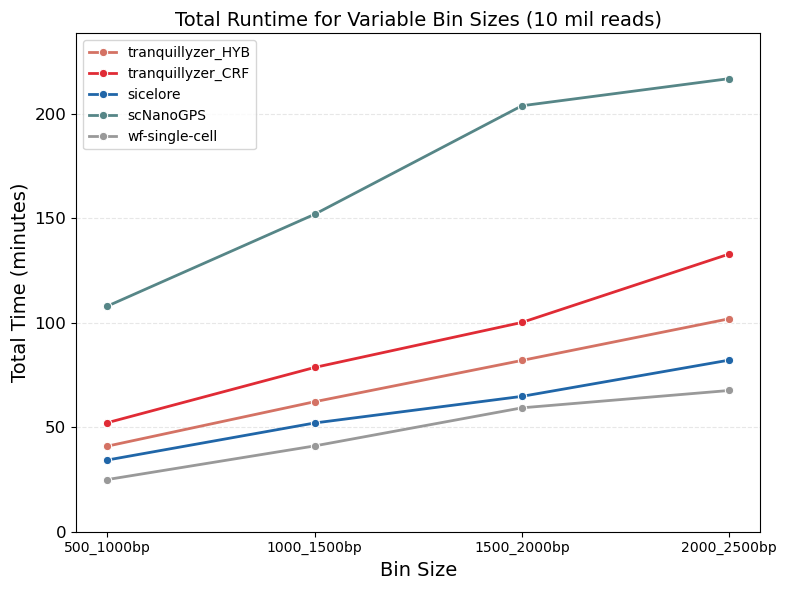

In [6]:
## plot variable bin sizes

import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure consistent dtypes before concatenation
sicelore_times_var_bs = sicelore_times_var_bs.with_columns([
    pl.col("bin_size").cast(pl.Utf8),
    pl.col("total_time").cast(pl.Float64)
])

scNanoGPS_times_var_bs = scNanoGPS_times_var_bs.with_columns([
    pl.col("bin_size").cast(pl.Utf8),
    pl.col("total_time").cast(pl.Float64)
])

wfsc_times_var_bs = wfsc_times_var_bs.with_columns([
    pl.col("bin_size").cast(pl.Utf8),
    pl.col("total_time").cast(pl.Float64)
])

tranquillyzer_times_var_bs = time_mem_500_2500bp.select(["bin_size", "total_time", "tool"]).with_columns(
    pl.col("bin_size").cast(pl.Utf8)
)

# Combine DataFrames
combined_times_var_bs = pl.concat([
    tranquillyzer_times_var_bs,
    sicelore_times_var_bs,
    scNanoGPS_times_var_bs,
    wfsc_times_var_bs
])

# Convert sample_size to numeric
# combined_times_var_ss = combined_times_var_ss.with_columns(
#     pl.col("sample_size")
#     .str.strip_chars("_mil")
#     .cast(pl.Int32)
#     .alias("sample_size_numeric")
# )

# Check data
print(combined_times_var_bs)

# Convert to pandas
df_plot = combined_times_var_bs.to_pandas()

# Sort for plotting
# df_plot = df_plot.sort_values(by="sample_size_numeric")

# Custom color palette
custom_palette = {
    "scNanoGPS": "#568687",
    "tranquillyzer_HYB": "#d47264",
    "tranquillyzer_CRF": "#e02b35",
    "sicelore": "#2066a8",
    "wf-single-cell": "#999999"
}

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df_plot,
    x="bin_size", y="total_time",
    hue="tool", marker="o", linewidth=2,
    palette=custom_palette
)

plt.xlabel("Bin Size", fontsize=14)
plt.ylabel("Total Time (minutes)", fontsize=14)
plt.title("Total Runtime for Variable Bin Sizes (10 mil reads)", fontsize=14)
# plt.xticks(df_plot["sample_size_numeric"].unique(), fontsize=12)
plt.yticks(fontsize=12)
# Automatically scale y-axis based on data range
plt.ylim(0, df_plot["total_time"].max() * 1.1)
plt.legend(title="", fontsize=10, loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/supplementary_figures/bench_time_500_2500.png", dpi=300, bbox_inches='tight')
plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/supplementary_figures/bench_time_500_2500.svg", bbox_inches='tight')
plt.savefig("/home/ayush.semwal/shen-secondary/projects/2025_03_12_tranquilizer_benchmarking/figures/supplementary_figures/bench_time_500_2500.pdf", bbox_inches='tight')
plt.show()
